In [4]:
from tensorflow.keras import datasets

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.utils import to_categorical

In [6]:
#from tensorflow.keras.datasets import mnist
##already X_train...y_test, so tuple unpacking
#(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [5]:
data = datasets.mnist

In [6]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [8]:
y_train[1]

0

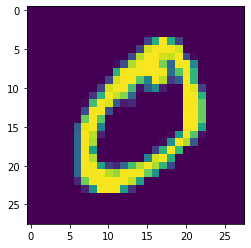

In [9]:
plt.imshow(X_train[1])

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

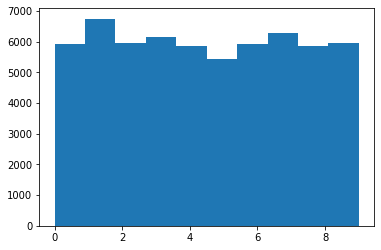

In [10]:
plt.hist(x=y_train)
#so about 6000 each

(array([ 980., 1135., 1032., 1010.,  982.,  892.,  958., 1028.,  974.,
        1009.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

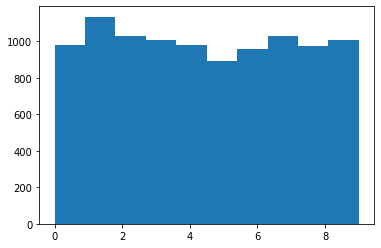

In [11]:
plt.hist(x=y_test)
#similar count in test and train dataset

In [15]:
X_train[0].max()

255

In [16]:
X_train = X_train/255
X_test = X_test/255

In [17]:
X_train[0].max()

1.0

In [18]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [19]:
y_test_cat[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train_cat.shape)
print(y_test_cat.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 10)
(10000, 10)


In [21]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D

In [23]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(2,2), strides=(1,1), input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(4,4), strides=(2,2),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(784,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
early = EarlyStopping(monitor='val_loss', patience = 2)

In [26]:
model.fit(X_train, y_train_cat, epochs=10,validation_data=(X_test,y_test_cat),callbacks=[early])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 41s 680us/sample - loss: 0.2405 - accuracy: 0.9255 - val_loss: 0.1162 - val_accuracy: 0.9629
Epoch 2/10
60000/60000 [==============================] - 35s 579us/sample - loss: 0.0942 - accuracy: 0.9698 - val_loss: 0.0664 - val_accuracy: 0.9795
Epoch 3/10
60000/60000 [==============================] - 34s 573us/sample - loss: 0.0665 - accuracy: 0.9791 - val_loss: 0.0654 - val_accuracy: 0.9797
Epoch 4/10
60000/60000 [==============================] - 35s 591us/sample - loss: 0.0532 - accuracy: 0.9837 - val_loss: 0.0787 - val_accuracy: 0.9751
Epoch 5/10
60000/60000 [==============================] - 35s 584us/sample - loss: 0.0431 - accuracy: 0.9858 - val_loss: 0.0686 - val_accuracy: 0.9782


In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
y_pred = model.predict_classes(X_test)

In [29]:
confusion_matrix(y_test, y_pred)

array([[ 965,    0,    0,    0,    4,    0,    2,    5,    2,    2],
       [   0, 1130,    0,    1,    1,    0,    0,    3,    0,    0],
       [   2,    1,  971,    4,    2,    0,    0,   50,    2,    0],
       [   0,    3,    2,  984,    0,    7,    0,    8,    5,    1],
       [   1,    0,    0,    0,  977,    0,    2,    0,    0,    2],
       [   2,    1,    0,    4,    0,  876,    1,    1,    6,    1],
       [   5,    5,    0,    0,   16,    3,  926,    0,    3,    0],
       [   0,    4,    2,    2,    1,    0,    0, 1015,    3,    1],
       [   1,    0,    3,    1,    1,    1,    3,    4,  952,    8],
       [   0,    1,    0,    1,    6,    3,    1,    7,    4,  986]],
      dtype=int64)

In [30]:
mat = confusion_matrix(y_test, y_pred)

In [36]:
uhlo = 0
neuh = 0
for i in range(0,10):
    for j in range(0,10):
        if(i==j):
            uhlo = uhlo+mat[i,j]
        else:
            neuh = neuh+mat[i,j]
print('precision of model is: ', uhlo/(uhlo+neuh)*100, '%')

precision of model is:  97.82 %


In [37]:
#but look back at the confusion matrix - worst score the model has for number combination of 7-2 and 4-6